# Load Dataset

In [58]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [18]:
print("Min pixel value", X_train.min())
print("Max pixel value", X_train.max())

Min pixel value 0
Max pixel value 255


In [19]:
print(X_train[:1])

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]]


# Normalize The Data By Dividing It TO 255

In [20]:
X_train_scaled  = X_train / 255.0
X_test_scaled = X_test / 255.0

In [21]:
print(X_train_scaled[:1])

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Create A Model

In [35]:
from tensorflow.keras import Sequential , models , layers
from tensorflow.keras.layers import Dense , Dropout ,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

#### Load The Pre-Trained Model

In [53]:
base_model = ResNet50(weights='imagenet' , include_top=False, input_shape=(128,128,3))

In [48]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

### Add Custome Fully Connected Layer

In [54]:
model = models.Sequential()

model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

### Create Final Mode

### Compile The Model

In [55]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5) , loss='sparse_categorical_crossentropy' , metrics=['acc'])

### Fit The Model

In [57]:
model.fit(X_train_scaled , y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 182s 129ms/step - acc: 0.3103 - loss: 2.1081 - val_acc: 0.8178 - val_loss: 0.6772
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 175s 110ms/step - acc: 0.7001 - loss: 1.0036 - val_acc: 0.8946 - val_loss: 0.4120
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 203s 111ms/step - acc: 0.8161 - loss: 0.7196 - val_acc: 0.9164 - val_loss: 0.3198
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 200s 109ms/step - acc: 0.8759 - loss: 0.5423 - val_acc: 0.9264 - val_loss: 0.2805
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 202s 110ms/step - acc: 0.9097 - loss: 0.4337 - val_acc: 0.9280 - val_loss: 0.2593
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 154s 109ms/step - acc: 0.9334 - loss: 0.3474 - val_acc: 0.9332 - val_loss: 0.2426
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 154s 109ms/step - acc: 0.9547 - loss: 0.2627 - val_acc: 0.9360 - val_loss: 0.2435
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 203s 110ms/step - acc: 0.9637 - loss: 0.2214 - val_acc: 0.9380 - val_loss: 0.2332
Epoch 9/

# Evaluate The Model

In [64]:
from sklearn.metrics import classification_report , confusion_matrix

In [63]:
model.evaluate(X_test_scaled , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - acc: 0.9338 - loss: 0.2646


[0.2522542178630829, 0.9358999729156494]

In [67]:
y_pred = model.predict(X_test_scaled)

y_pred_class = y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


Text(50.722222222222214, 0.5, 'Truth')

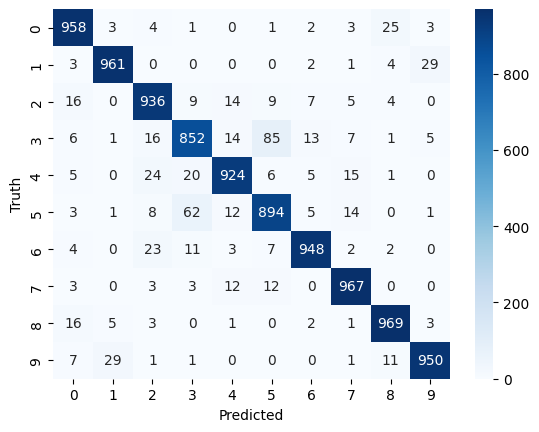

In [68]:
conf_matx = confusion_matrix(y_test , y_pred_class)

sns.heatmap(conf_matx , annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
report = classification_report(y_test , y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.96      0.96      1000
           2       0.92      0.94      0.93      1000
           3       0.89      0.85      0.87      1000
           4       0.94      0.92      0.93      1000
           5       0.88      0.89      0.89      1000
           6       0.96      0.95      0.96      1000
           7       0.95      0.97      0.96      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

